# **USA House Price Prediction**

## **Importing Libraries**

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## **Loading the Dataset**

In [150]:
df = pd.read_csv("/content/drive/MyDrive/Data Science Learning/7. ML Projects /1. USA House Price Prediction/2. USA_Housing_data.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## **Description of Each Column**

***

### 1. **`Avg. Area Income`**: This column typically represents the average income of residents in a particular area or neighborhood.

### 2. **`Avg. Area House Age`**: This variable may indicate the average age of houses or properties in the area.

### 3. **`Avg. Area Number of Rooms`**: This column might represent the average number of rooms in houses in the area.

### 4. **`Avg. Area Number of Bedrooms`**: This variable could represent the average number of bedrooms in houses in the area.

### 5. **`Area Population`**: This column typically represents the population of the area or neighborhood.

### 6. **`Price`**: This is the price of houses or properties in the area, often used as a target variable in real estate analyses.

### 7. **`Address`**: This column may contain the addresses or location descriptions of the properties, helping to identify their specific locations.

***

## **Renaming the Columns**

In [151]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [152]:
df.rename(
           columns = {
               'Avg. Area Income':'Area_Income',
               'Avg. Area House Age':'House_Age',
               'Avg. Area Number of Rooms':'NRooms',
               'Avg. Area Number of Bedrooms':'NBedrooms',
               'Area Population':'Area_Population',
               'Price':"House_Price",
               'Address':'House_Address'
             },
           inplace = True
)

## **Understanding the Data**

In [153]:
# Shape of Data

df.shape

(5000, 7)

> ### The Dataset contains **`7 Columns`** and **`5000 Rows`**

In [154]:
# Checking Data Rows Randomly

df.sample(5)

,Area_Income,House_Age,NRooms,NBedrooms,Area_Population,House_Price,House_Address
4634,89730.523626,5.986103,9.044253,6.07,23059.654251,1.792753e+06,"97191 Chambers Shore\nEast Davidshire, MP 06664"
1411,71328.704441,6.621666,6.932756,4.36,28053.016397,1.429498e+06,"510 Williams Inlet Apt. 674\nNew Timothymouth,..."
2727,79120.441521,5.083361,5.401787,4.25,39563.971196,1.046030e+06,1103 Samuel Lodge Suite 341\nNorth Richardberg...
3762,45530.768035,5.402341,7.069744,3.32,31000.299037,4.269062e+05,"241 David Radial\nArielmouth, WI 24753"
3570,50337.067497,4.853508,6.241565,4.22,32299.064648,3.909484e+05,"5276 Sanchez Passage Suite 789\nStevenville, G..."


In [155]:
# Checking datatype of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area_Income      5000 non-null   float64
 1   House_Age        5000 non-null   float64
 2   NRooms           5000 non-null   float64
 3   NBedrooms        5000 non-null   float64
 4   Area_Population  5000 non-null   float64
 5   House_Price      5000 non-null   float64
 6   House_Address    5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


> ### All Columns of dataset are numerical - float datatype except Address Column

In [156]:
# Checking for any missing values

df.isnull().sum()

,0
Area_Income,0
House_Age,0
NRooms,0
NBedrooms,0
Area_Population,0
House_Price,0
House_Address,0


> ### There are **`No Missing Values`** in the dataset

In [157]:
# Analyzing the Statistics of Dataset

df.describe()

,Area_Income,House_Age,NRooms,NBedrooms,Area_Population,House_Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


> ### 1. The Area Income of all was around 60k to 75k but some had above 1 Lakh
> ### 2. The Houses age was around 5-6 years few had 2 year old house and other few has 9 year old house
> ### 3. On an average each has 6-7 rooms but few houses has only 2 rooms and other few has 10 rooms
> ### 4. On an average area population of each house was around 35k to 45k , but few houses has very less population in 100's and few has very huge of 65k

In [158]:
# Analyzing House_Address column
df['House_Address'].nunique()

5000

> ### The Address of each House is very unique and doesn't add any value to our house price prediction. Hence dropping it.

In [159]:
df.drop(columns = ['House_Address'],inplace = True)

In [160]:
df.head(2)

,Area_Income,House_Age,NRooms,NBedrooms,Area_Population,House_Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06


## **Exploratory Data Analysis (EDA)**

### **Histogram of Area Income**

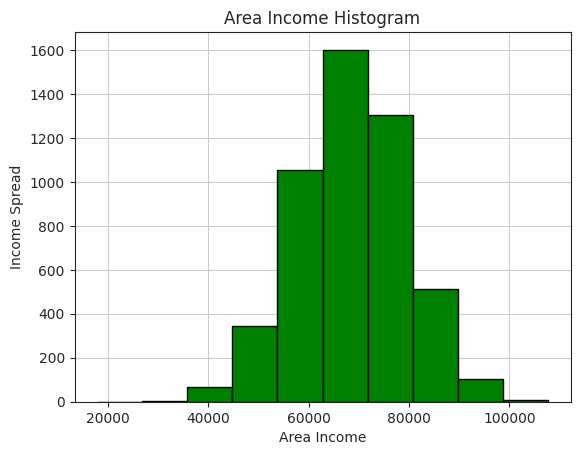

In [161]:
plt.hist(df['Area_Income'], bins=10, color = 'Green',edgecolor='black')
plt.xlabel('Area Income')
plt.ylabel('Income Spread')
plt.title('Area Income Histogram')
plt.grid(True)
plt.show()

#### **Observation:**
#### 1. The Histogram tells many people belong to the area income of 65k to 70k
#### 2. Few people are having area income lessthan 60k and other Feww greater than 80k
#### 3. Very Few people have income between 20k and 40k and some other have greater than 1 lakh


### **Histogram of House Age**

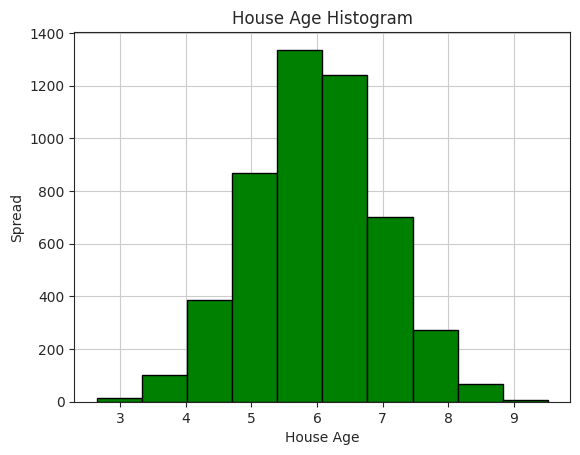

In [162]:
plt.hist(df['House_Age'], bins=10, color = 'Green', edgecolor='black')
plt.xlabel('House Age')
plt.ylabel('Spread')
plt.title('House Age Histogram')
plt.grid(True)
plt.show()

#### **Observation:**
#### 1. Most of the Houses are 5 - 7 years old
#### 2. Few Houses are have age between 2 and 5
#### 3. Other Few have age between 7 and 10

### **No. of Rooms Histogram**

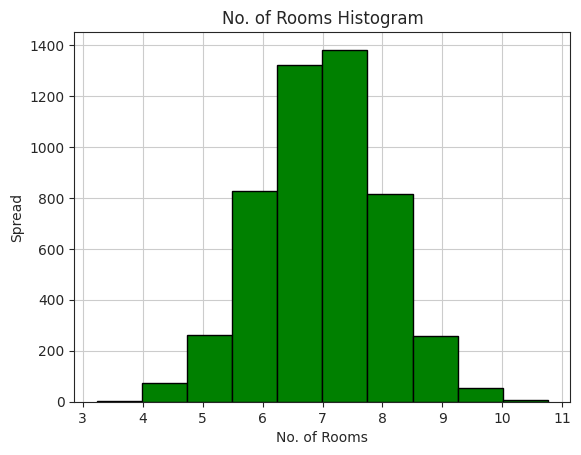

In [163]:
plt.hist(df['NRooms'], bins=10, color = 'Green', edgecolor='black')
plt.xlabel('No. of Rooms')
plt.ylabel('Spread')
plt.title('No. of Rooms Histogram')
plt.grid(True)
plt.show()

#### **Observation:**
#### 1. Many houses have 6 - 8 rooms
#### 2. Few had 4 - 6 Rooms and 8 - 10
#### 3. Very few had 3 - 4 rooms or greater than 10 rooms

### **No. of Bedrooms Histogram**

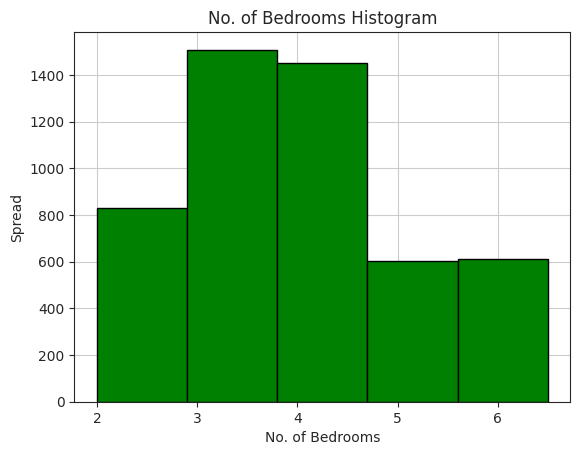

In [164]:
plt.hist(df['NBedrooms'], bins=5, color = 'Green', edgecolor='black')
plt.xlabel('No. of Bedrooms')
plt.ylabel('Spread')
plt.title('No. of Bedrooms Histogram')
plt.grid(True)
plt.show()

#### **Observation:**

#### 1. The Most Houses have 3-5 bedrooms
#### 2. Two Bedroom Houses (2BHK) are more
#### 3. Few also have more than 6 bedrooms


### **Area Population Histogram**

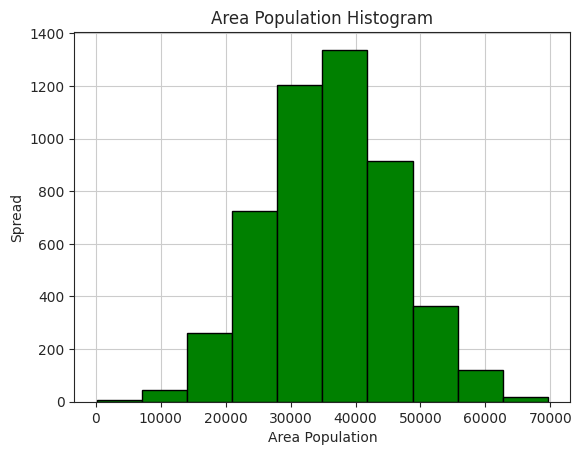

In [165]:
plt.hist(df['Area_Population'], bins=10, color = 'Green', edgecolor='black')
plt.xlabel('Area Population')
plt.ylabel('Spread')
plt.title('Area Population Histogram')
plt.grid(True)
plt.show()

#### **Observation:**

1. Most of the Areas have population between 20k and 50k
2. A very Few have population lessthan 20k or greater than 50k

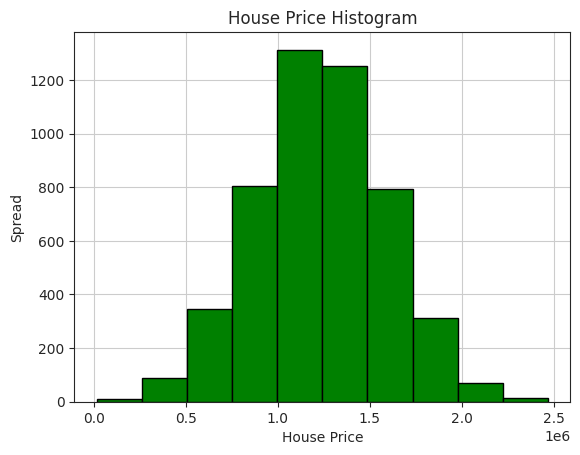

In [166]:
plt.hist(df['House_Price'], bins=10, color = 'Green', edgecolor='black')
plt.xlabel('House Price')
plt.ylabel('Spread')
plt.title('House Price Histogram')
plt.grid(True)
plt.show()

#### **Observation:**
#### 1. Most of the Houses have prize range between 0.75 to 1.75
#### 2. Very few have less prices i.e lessthan 0.5 and Very few other have huge price i.e greater than 2

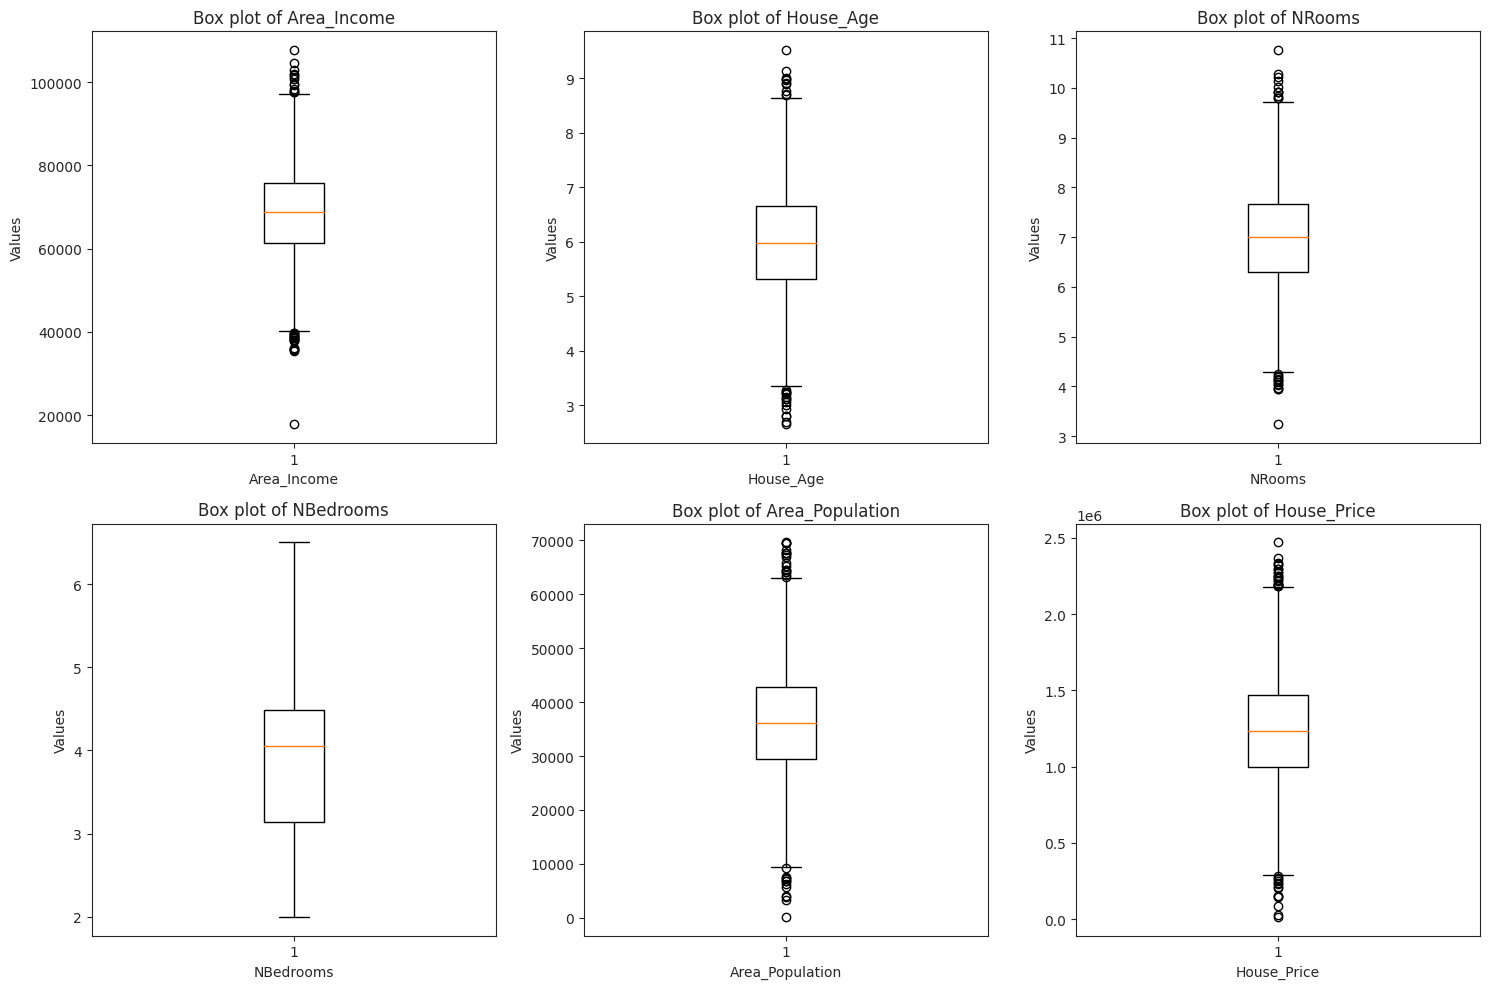

In [167]:
columns = ['Area_Income', 'House_Age', 'NRooms', 'NBedrooms', 'Area_Population', 'House_Price']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2x3 grid of subplots

axs = axs.flatten()

for i, column in enumerate(columns):
    axs[i].boxplot(df[column])
    axs[i].set_title(f'Box plot of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Values')

plt.tight_layout()

plt.show()

#### **Observation:**

#### 1. All the Features are having Outliers except No. of Bedrooms
#### 2. These Outliers are may be correct because have some houses with huge/ow prices as they may had more/less number of bedrooms and other factors.


### **Scatter Plot between House Age and House Price for Market Analysis**

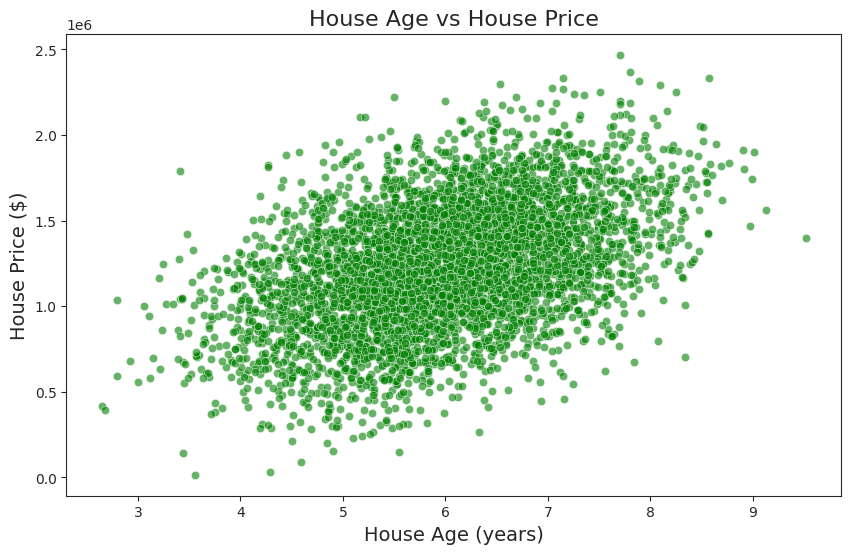

In [168]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='House_Age', y='House_Price', data=df, color='green', alpha=0.6)
plt.title('House Age vs House Price', fontsize=16)
plt.xlabel('House Age (years)', fontsize=14)
plt.ylabel('House Price ($)', fontsize=14)
plt.show()

#### **Observation:**

#### 1. From the above scatter plot we can see that most of the House prices are increasing with the increase of House Age
#### 2. But few New houses have High price and some other old houses have low price this can be due
#### 3. May this is due to other factors like No. of Rooms and Bedrooms
#### 4. But House Age and House Price are in positive corelation

## **Pair Plot between All Features**

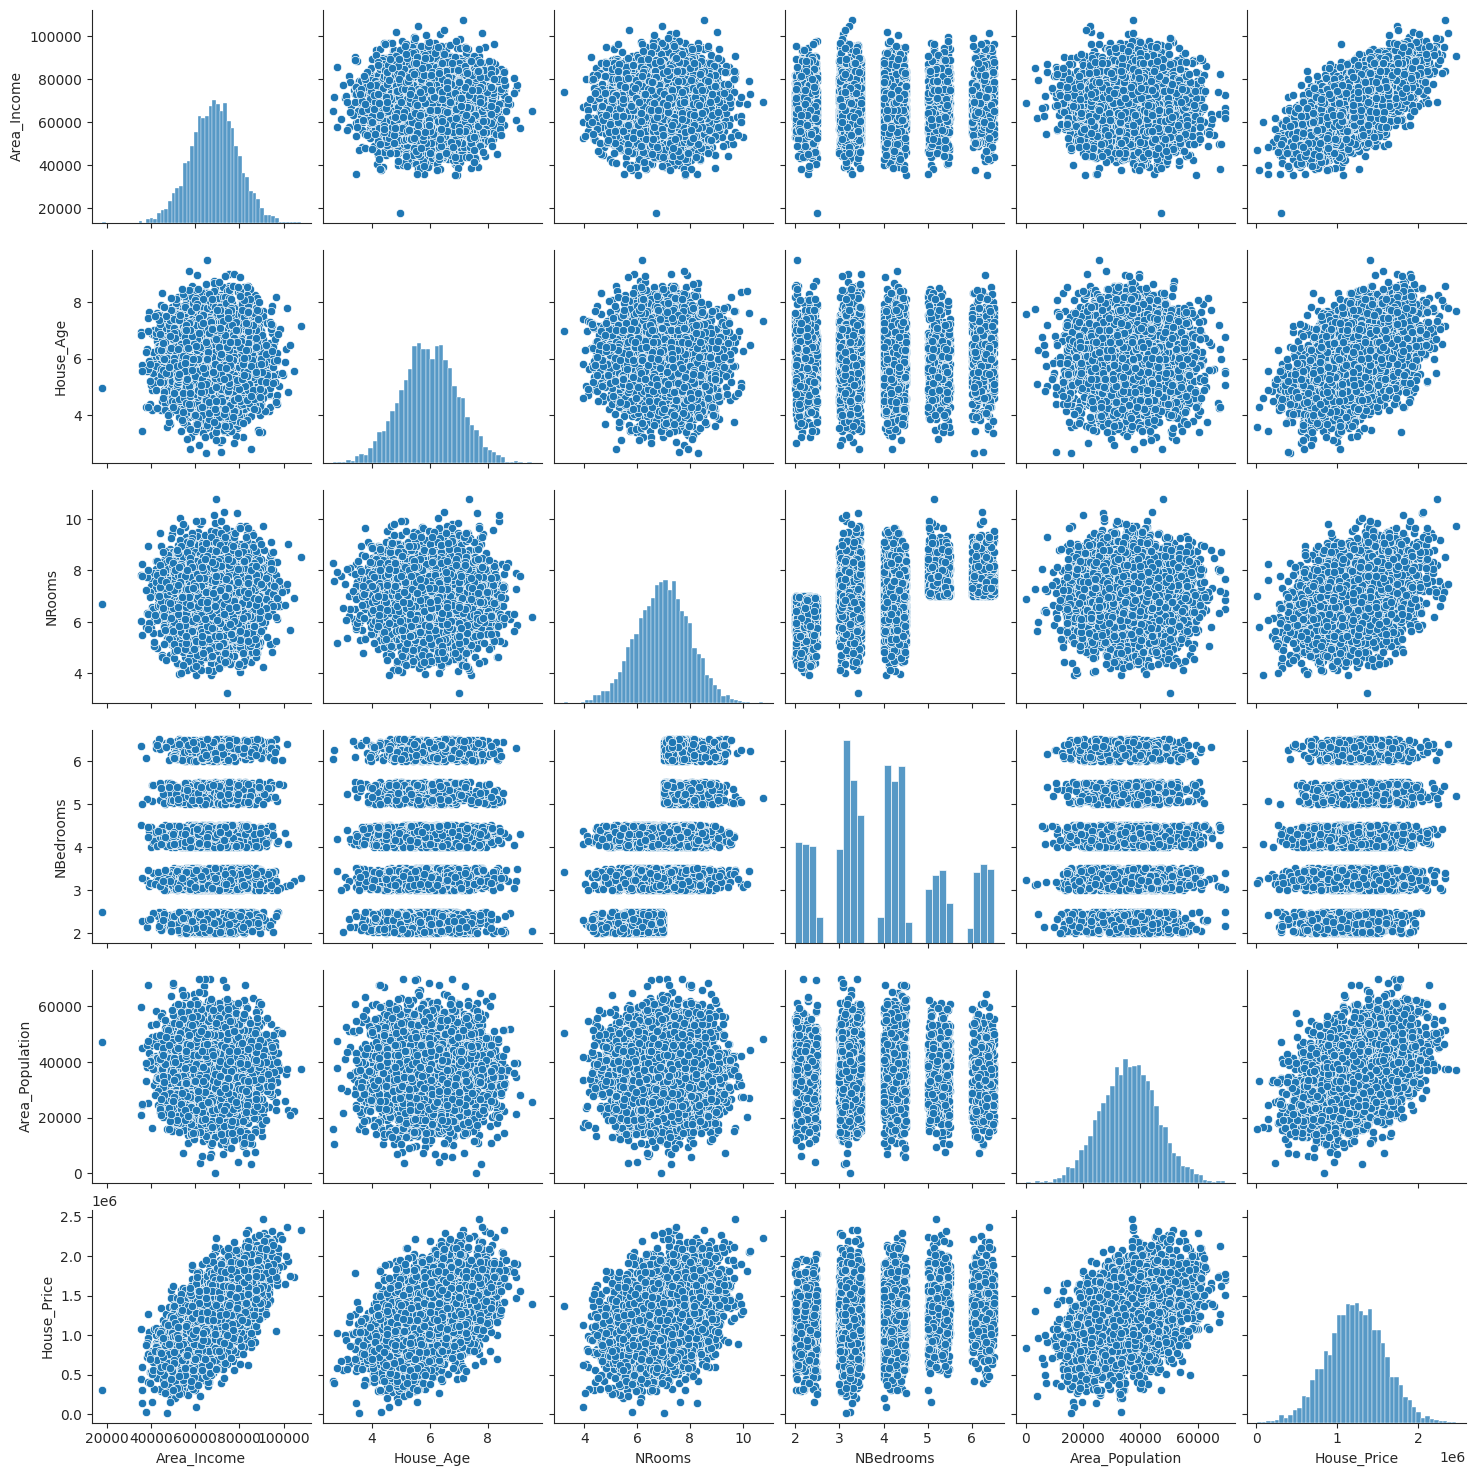

In [169]:
sns.set_style('ticks')
sns.pairplot(df)
plt.show()

### **Observation:**
***
### From the above pairplot we can understand that All features are in postive corelation with House Price



### **Understanding Corelation between columns**

In [170]:
df.corr()

,Area_Income,House_Age,NRooms,NBedrooms,Area_Population,House_Price
Area_Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
House_Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
NRooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
NBedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area_Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
House_Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


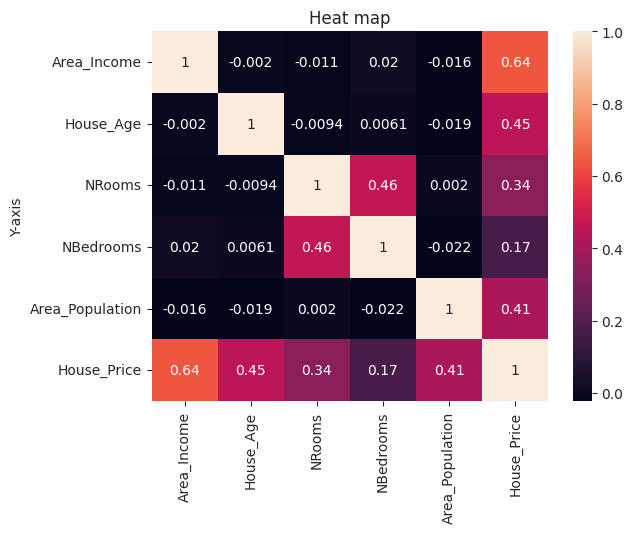

In [171]:
sns.heatmap(df.corr(),annot = True)
plt.ylabel("Y-axis")
plt.title("Heat map")
plt.show()

### **Observation:**
***
### 1. From the above observation we can see that All Columns are in positive corelation with House Price

### 2. Area Income, House Age and Area Population have a strong corealtion with House Price

### 3. No. of Rooms and No. of Bedrooms are in postive corelation but not much strong

### 4. Hence we can select these four features as input data for House Price Prediction model

### 5. Number of Rooms and Bedrooms are also in strong corelation this means that, No. of Bedrooms are not more than actual No. of Rooms, Hence data is valid

### 6. All other features doesnt have any strong corelation between each other

## **Market Analysis:**
***
### 1. Over the time, As the Age of House increase the Price Value of House also Increases

### 2. If Number of Rooms and Bedrooms increases the Price of House increases by a little

### 3. The Area Population has a significant impact on the Price of House. If the Area has more population the price of house increases

## **Investment Decisions:**

***
### On basis of Histograms, Pairplot and Heatmap ,
### 1. We can Invest on the New Houses which has age of 4 - 8 beacuse the current value for these is less but in the future (next few years) the house price increases

### 2. Good to Invest in the houses which are new and have 5 - 9 rooms which include any number of bedrooms between 2 - 5

### 3. Good to Invest in the houses which are in areas with population between 20k and 60k


### 4. **`Optimal Investment`** will be the House which is 4 years old having 8 rooms with 5 bedrooms in an area with population around 50k



## **Property Valuation**
***

### 1. The Price of House is very less when its new with age of 3-5 , over the 3-4 years the House price increases drastically

### 2. The Price of House increases with increase of No. of rooms (4 - 9) and bedrooms

### 3. The Price of House is Huge in a much populated area (40k - 60k)

## **Feature Selection**
***

### From above Visualization and Analysis, All the Features are Important as they have Huge Impact on Target House Price

## **House Price Prediction**
***

### **Separating Input features and Target feature**

In [172]:
x = df.drop(columns = ['House_Price'])
y = df['House_Price']

In [173]:
x.sample(3)

,Area_Income,House_Age,NRooms,NBedrooms,Area_Population
4184,68944.997712,7.311621,9.229064,6.38,56617.143284
1382,42462.099587,6.039003,8.058237,4.18,42191.776016
3273,68114.180832,5.362425,7.228431,6.13,40035.650372


In [174]:
y.sample(3)

,House_Price
951,1.378864e+06
1117,1.538985e+06
2749,1.200653e+06


### **Train Test Splitting the Data**

In [175]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

## **Training a Linear Regression Model**

In [176]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

### **Evaluating Linear Regression Model**

In [177]:
# Accuracy
print('Accuracy score: {}'.format(lr.score(x_test,y_test)*100))

Accuracy score: 91.66912271539812


In [178]:
# Model Scores

train_score = lr.score(x_train,y_train)*100

test_score = lr.score(x_test,y_test)*100

print("training score : ",train_score)
print("testing score : ",test_score)

training score :  91.85881420083194
testing score :  91.66912271539812


### The Training Accuracy and Testing Accuracy are very close to eachother, this says linear regression model learned the data well

In [179]:
# intercept
print('Intercept: ',lr.intercept_)

Intercept:  -2645289.864341692


In [180]:
# regression coefficients
print('Coefficients: ', lr.coef_)

Coefficients:  [2.16398550e+01 1.65729214e+05 1.20958349e+05 1.94909254e+03
 1.52262240e+01]


### **Making House Price Predictions using the trained Linear Regression Model**

In [181]:
y_pred = lr.predict(x_test)
y_pred

array([1555151.93144932, 1583399.08583384,  941481.35482437, ...,
       1099846.27252117,  974837.76044488, 1731306.80613867])

### **Comparing the Model Predicted Values with Actual Values**

Text(0.5, 1.0, 'Actual vs Predicted')

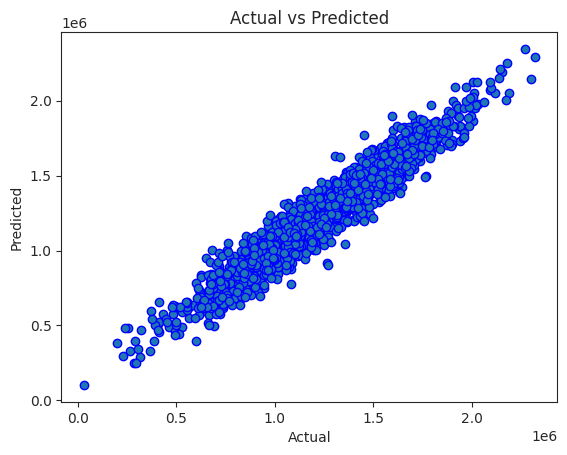

In [182]:
plt.scatter(x = y_test, y = y_pred,edgecolor = 'blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Actual vs Predicted")

### **Making predictions on custom data**

In [183]:
cust_pred1 = lr.predict([[78556.797054,6.162173,5.783254,3.16,34677.724299]]) #Actual data row
print("Custom Prediction Result",cust_pred1)

Custom Prediction Result [1309622.70829351]


In [184]:
cust_pred2 = lr.predict([[78000.00,6.000,5.000,3.00,34000.00]])
print("Custom Prediction Result",cust_pred2)

Custom Prediction Result [1165324.74951367]


### From the above custom predictions we can see that model is performing well as the input row data is close to each other, the predicted results are also close to each other

## **Evaluation Metrics**

In [185]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculating R² score
r2 = r2_score(y_test, y_pred)

accuracy = r2 * 100

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculating Root Mean Squared Error (MSE)
rmse = mse**(0.5)

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print(f'R² Score: {r2}')
print(f'Accuracy (R² * 100): {accuracy}%')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

R² Score: 0.9166912271539811
Accuracy (R² * 100): 91.66912271539812%
Mean Squared Error: 10567448570.930101
Root Mean Squared Error: 102798.0961444817
Mean Absolute Error: 82745.9089415616


## **Observation**
***
### 1. A high R² value close to 1 indicates that the model is performing well in fitting the data. In this case, 91.67% of the variability in house prices is captured by the model, suggesting it’s a strong predictor.

### 2. The model's accuracy is 91.67%, indicating it performs very well in predicting the target variable.

### 3. A lower MSE indicates better performance, but since house prices can be high, the magnitude of MSE is can be large.

### 4. The average prediction error is approximately 102,798.10, indicating the typical magnitude of the model's prediction errors.

### 5. An MAE of 82,745.91 means, on average, model's predictions deviate from the actual house prices by about $82,746. This gives you a sense of how far off model’s predictions are from the actual values in practical terms

### **Cross Validation**

In [186]:
from sklearn.model_selection import cross_val_score

cross_val_value_training=cross_val_score(lr,x_train,y_train,cv=10)

cross_val_value_training.mean()

0.9180414976793754

In [187]:
cross_val_value_testing=cross_val_score(lr,x_test,y_test,cv=10)

cross_val_value_testing.mean()

0.9147074641353246

### Cross Validation Values for both training and testing are close to each and also with model accuracy

### Hence, there is no Overfitting or Underfitting of data and model is stable and consistent across different data samples.

### Linear Regression model is working well

## **Saving the Linear Regression Model**

In [188]:
import joblib

# Save the trained model to a file
joblib.dump(lr, 'lr_hp_pred_model.pkl')

['lr_hp_pred_model.pkl']

In [190]:
# To load the model later
loaded_model = joblib.load('lr_hp_pred_model.pkl')